# Week 2 workshop

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
from pandas import DataFrame
import numpy as np


## Generating Random plots

In [3]:
# If the index consists of dates, it calls gcf().autofmt_xdate() to format the time
ts = Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

## Stylising the plot

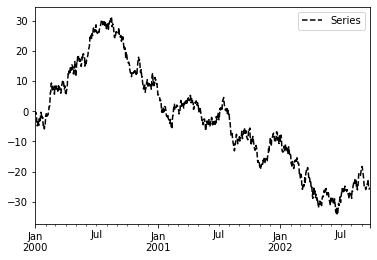

In [4]:
ts.plot(style='k--', label='Series')
plt.legend()

## cumsum()
Returns the cummulative sum over a DataFrame or Series axis.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.cumsum.html


In [5]:
s = pd.Series([2, np.nan, 5, -1, 0])
s

0    2.0
1    NaN
2    5.0
3   -1.0
4    0.0
dtype: float64

In [6]:
s.cumsum()

0    2.0
1    NaN
2    7.0
3    6.0
4    6.0
dtype: float64

## diff()

Calculates the difference of a dataframe element compared to another element (usually in the same row)

In [7]:
diffdf = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
                   'b': [1, 1, 2, 3, 5, 8],
                   'c': [1, 4, 9, 16, 25, 36]})
diffdf[:5]

,a,b,c
0,1,1,1
1,2,1,4
2,3,2,9
3,4,3,16
4,5,5,25


In [8]:
diffdf.diff()[:5]


,a,b,c
0,NaN,NaN,NaN
1,1.0,0.0,3.0
2,1.0,1.0,5.0
3,1.0,1.0,7.0
4,1.0,2.0,9.0


## Multiple plots

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')


<AxesSubplot:>

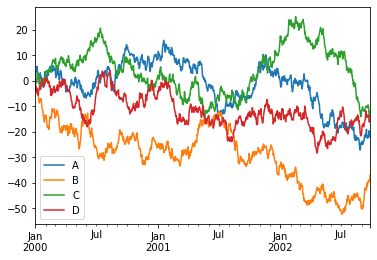

In [9]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))
print(ts.index[:5]) # This grabs the index made for the first Series
df = df.cumsum()
df.plot()

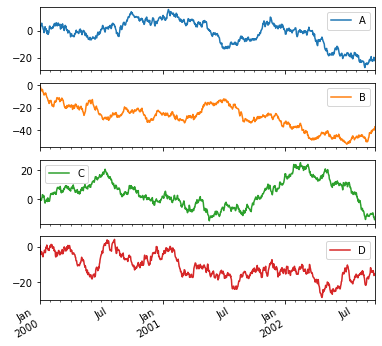

In [10]:
df.plot(subplots=True, figsize=(6,6))
plt.legend()
plt.show()

Text(0.5, 1.0, 'D')

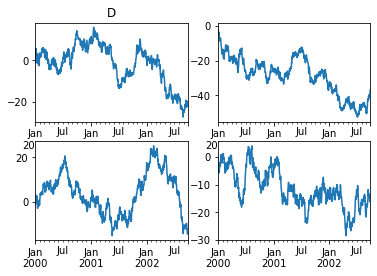

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)

df['A'].plot(ax=axes[0,0])
axes[0,0].set_title('A')

df['B'].plot(ax=axes[0,1])
axes[0,0].set_title('B')

df['C'].plot(ax=axes[1,0])
axes[0,0].set_title('C')

df['D'].plot(ax=axes[1,1])
axes[0,0].set_title('D')

## Adding and plotting columns to a DF or Series

In [12]:
# This line creates a dataframe, 2D array
df2 = pd.DataFrame(np.random.randn(1000,2), columns=['B','C']).cumsum()

Column Values:  ['B' 'C' 'A']
          B         C  A
0 -1.999453 -1.132267  0
1 -2.488005 -0.573880  1
2 -2.370967  0.697499  2
3 -2.947383  0.098032  3
4 -3.284003  0.278958  4


<AxesSubplot:xlabel='A'>

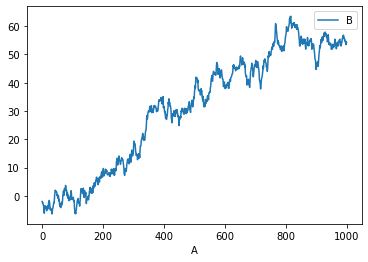

In [13]:
# This line adds an additional column
df2['A'] = Series(list(range(len(df))))

# Now the DataFrame has three columns
print('Column Values: ',df2.columns.values)
print(df2[:5])

# If you plot it, the first column will be displayed
df2.plot(x='A', y='B') 

<AxesSubplot:>

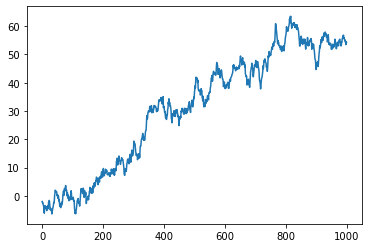

In [14]:
df2.B.plot()

<AxesSubplot:>

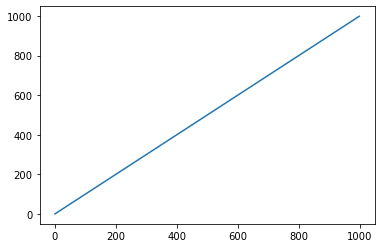

In [15]:
df2.A.plot()

<AxesSubplot:>

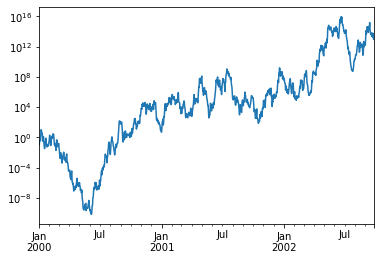

In [16]:
ts = Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
ts = np.exp(ts.cumsum())
ts.plot(logy=True)  # We pass this as True to get a log-scale y-axis

<AxesSubplot:label='710f46b9-81a6-4655-913c-27f9d6029f96'>

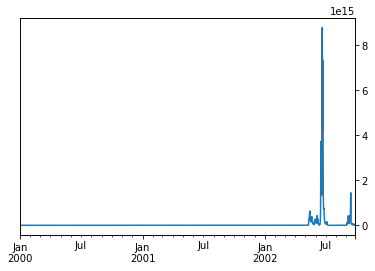

In [17]:
ts.plot(secondary_y=True)

## Plotting data on a secondary y-axis
A secondary axis allows us to represent and visualize multiple data series without the need to use additional charts. You can use the same scale as the primary Y scale or a different one. In the examples below, we are keeping the same Y-axis

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')


<AxesSubplot:>

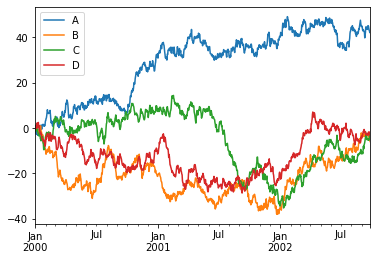

In [18]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))
print(ts.index[:5]) # This grabs the index made for the first Series
df = df.cumsum()
df.plot()

Text(0, 0.5, 'AB scale')

<Figure size 432x288 with 0 Axes>

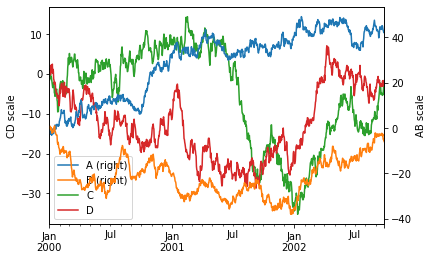

In [19]:
plt.figure()
ax = df.plot(secondary_y=['A','B'])
ax.set_ylabel('CD scale')
ax.right_ax.set_ylabel('AB scale')

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

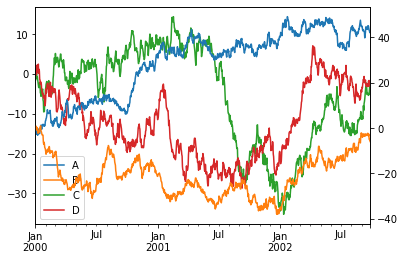

In [20]:
# To turn off automatic marking, we can use mark_right=False
plt.figure()
df.plot(secondary_y=['A','B'], mark_right=False)

## Suppressing tick resolution adjustment

<AxesSubplot:>

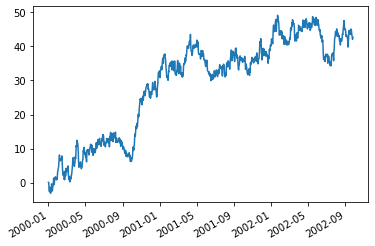

In [21]:
plt.figure()

df.A.plot(x_compat=True)

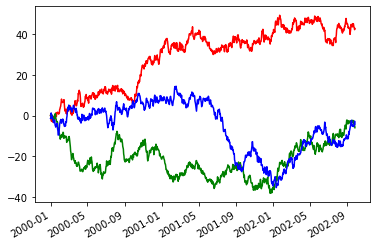

In [22]:
plt.figure()
with pd.plotting.plot_params.use('x_compat', True):
    df.A.plot(color='r')
    df.B.plot(color='g')
    df.C.plot(color='b')

## Types of plots

### Bar plots

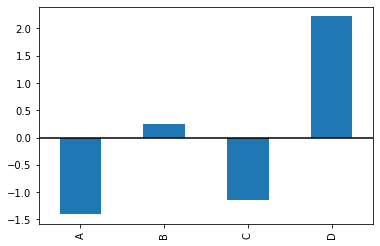

In [23]:
plt.figure()
df.iloc[5].plot(kind='bar')
plt.axhline(0, color='k')

<AxesSubplot:>

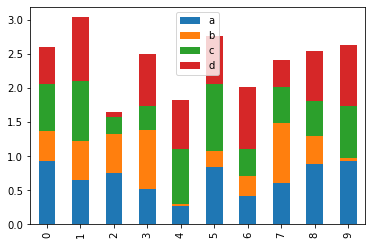

In [24]:
df2 = pd.DataFrame(np.random.rand(10,4), columns=['a','b','c','d'])
df2.plot(kind='bar', stacked=True)

### Histograms

<AxesSubplot:>

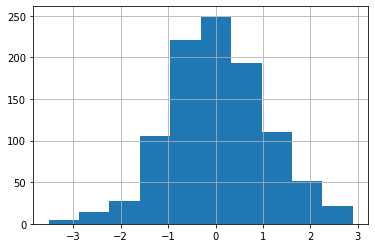

In [25]:
plt.figure()
df['A'].diff().hist()

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

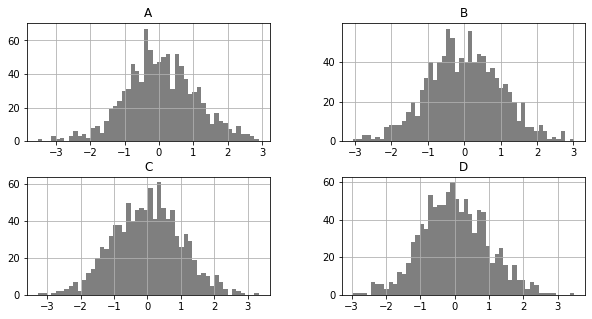

In [26]:
plt.figure()
df.diff().hist(color='k', alpha=0.5, bins=50, figsize=(10,5))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

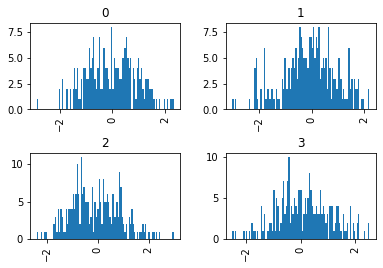

In [27]:
data = Series(np.random.randn(1000))
# The use of by is used to classify the data into groups. So we randomly generate 1000 numbers between 0 and 4 which will allocate the random data.
data.hist(bins = 100,by=np.random.randint(0,4,1000), figsize=(6,4))

### Box-plotting (japanese)

          0         1         2         3         4
0  0.341173  0.735331  0.844238  0.793941  0.042404
1  0.998683  0.548095  0.431166  0.933330  0.500240
2  0.004474  0.438232  0.209564  0.313553  0.457666
3  0.341523  0.208028  0.212092  0.886980  0.042226
4  0.183318  0.823698  0.102103  0.397260  0.992136
5  0.698938  0.045314  0.184482  0.624133  0.685840
6  0.942947  0.319353  0.893207  0.533060  0.003586
7  0.367381  0.370816  0.017258  0.136059  0.756764
8  0.964650  0.820762  0.361151  0.771758  0.306538
9  0.816745  0.731351  0.361875  0.764822  0.349918


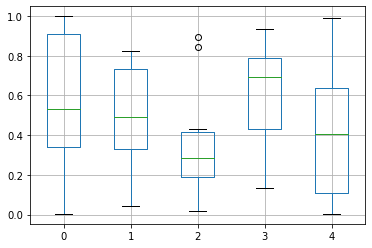

In [28]:
df = DataFrame(np.random.rand(10,5))
print(df)
plt.figure()
bp = df.boxplot()

In [29]:
df = DataFrame(np.random.rand(10,2), columns=['col1', 'col2'])

df['X'] = Series(['A','A','A','A','A','B','B','B','B','B','B'])
df

,col1,col2,X
0,0.156163,0.799903,A
1,0.799569,0.917959,A
2,0.547279,0.223782,A
3,0.158976,0.501716,A
4,0.677310,0.801552,A
5,0.583045,0.538605,B
6,0.686455,0.655099,B
7,0.672740,0.668586,B
8,0.519614,0.389327,B
9,0.302737,0.362356,B


<Figure size 432x288 with 0 Axes>

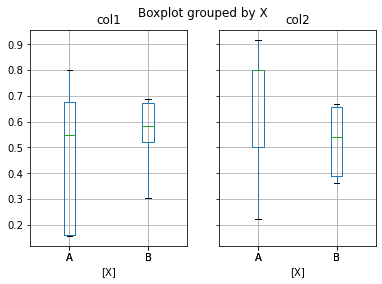

In [30]:
plt.figure()
bp = df.boxplot(by = 'X')

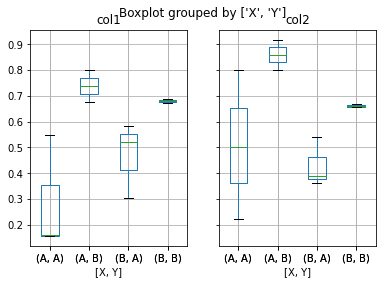

In [31]:
df['Y'] = Series(['A','B','A','A','B','A','B','B','A','A','B'])

bp = df.boxplot(by = ['X', 'Y'])

### Autocorrelation

QUESTION: I don't understand autocorrelation very well. 

Autocorrelation sees the dependency on one feature on another. Many times this can be damaging to the prediction, so you need to eliminate the autocorrelation.

Does autocorrelation compare two datasets, or does it compare a dataset to linear regression line?

In the example below it compares data to itself. A dot where y=1 in the sine function, will have very strong correlation to the next y value, because if it has reached the maximum value, it means it's going to descend. That is a negative correlation.

The plot of the random data shows a lot of noise. Noise must be eliminated.


<AxesSubplot:>

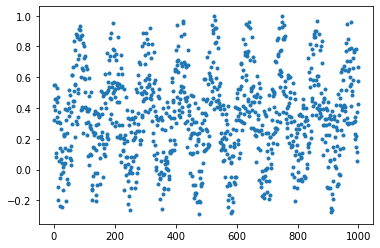

In [64]:
from pandas.plotting import autocorrelation_plot

data = Series(0.7 *np.random.rand(1000) + 0.3*np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))

data.plot(style=".")

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

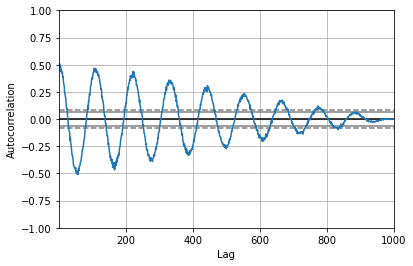

In [66]:
# If the original function has values from -2, to 1, why does it appear shrinked in the graph below?
autocorrelation_plot(data)

<AxesSubplot:xlabel='x', ylabel='y'>

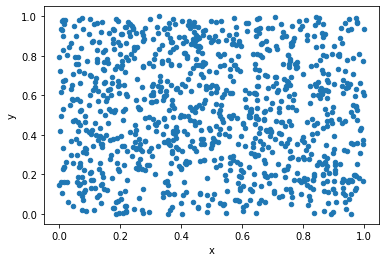

In [58]:
data = DataFrame(np.random.rand(1000,2) , columns=['x','y'])
data.plot(kind='scatter', x='x', y='y')


<AxesSubplot:>

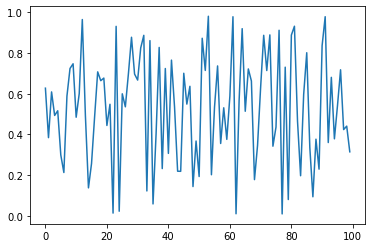

In [59]:
data= Series(np.random.rand(100))
data.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

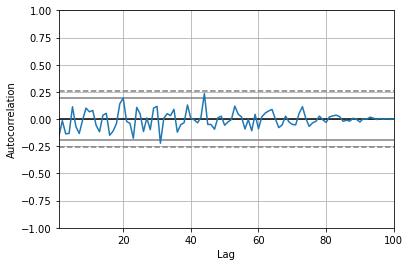

In [60]:
autocorrelation_plot(data)


### Bootstrap plots

QUESTION: The bootstrap plots are "used to visually asses the uncertainty of a statistic, such as mean, median and midrange". 

However, why calculate a percentage or probability when you can calculate the exact value of the mean, median and midrange?

What is the use for those measurements?

ANSWER: Because many times you will be using a sample of the data, or will not have access to all the data there is on the matter. Therefore, to remove the uncertainty, these measurements will be expressed in probabilities.




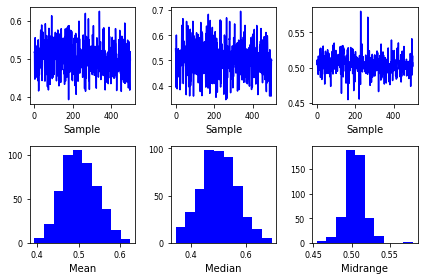

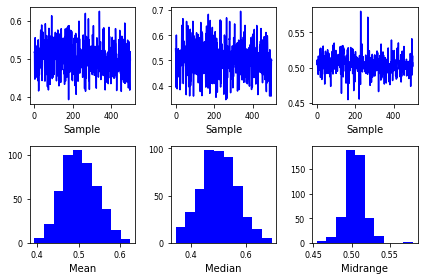

In [61]:
from pandas.plotting import bootstrap_plot
data = Series(np.random.rand(1000))

bootstrap_plot(data, size=50, samples=500, color='blue')